In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [6]:
pelvis = pd.read_csv('David-60-pokus01/Xsens_DOT_2_D422CD006474_20250409_105708.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-60-pokus01/Xsens_DOT_4_D422CD006380_20250409_105708.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-60-pokus01/Xsens_DOT_3_D422CD006379_20250409_105708.csv', skiprows= 7,  sep=',')

In [7]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()


# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [8]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,777.000000,777.000000
mean,0.643294,6466.796000
std,7.420430,3740.822661
min,-117.473518,0.000000
25%,0.752677,3233.398000
50%,0.994163,6466.796000
75%,1.369622,9700.194000
max,69.209915,12933.592000


In [9]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,777.000000,777.000000
mean,-0.544165,6466.796000
std,6.233147,3740.822661
min,-105.312973,0.000000
25%,-0.781648,3233.398000
50%,-0.151686,6466.796000
75%,0.444962,9700.194000
max,62.381615,12933.592000


In [10]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,777.000000,777.000000
mean,1.066170,6466.796000
std,3.068794,3740.822661
min,-11.439313,0.000000
25%,0.280169,3233.398000
50%,0.684988,6466.796000
75%,0.901501,9700.194000
max,34.133801,12933.592000


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

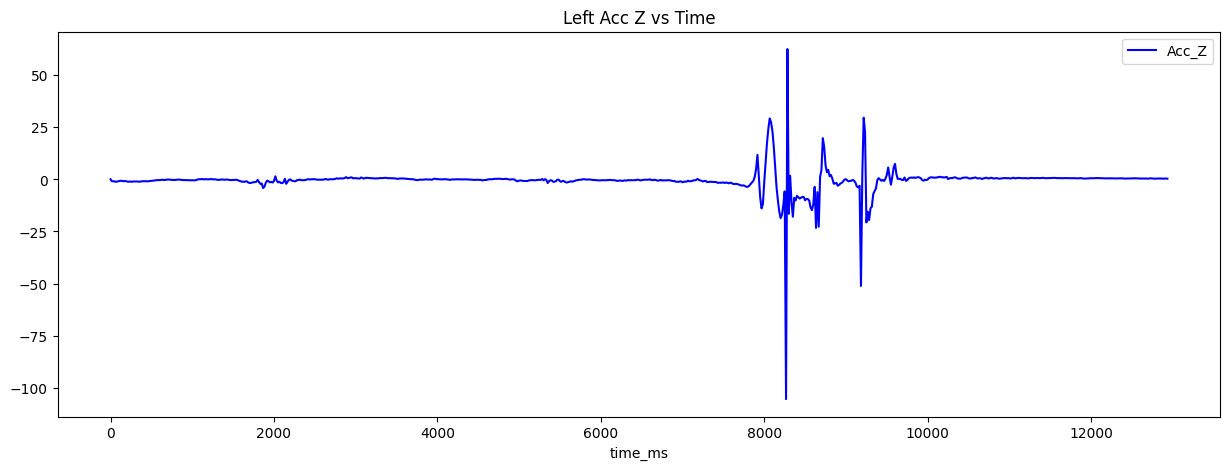

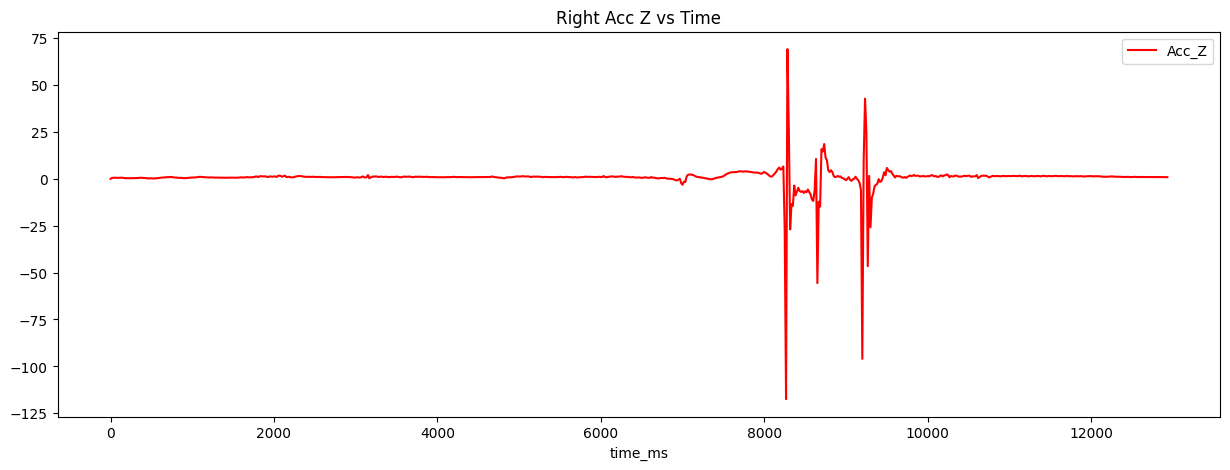

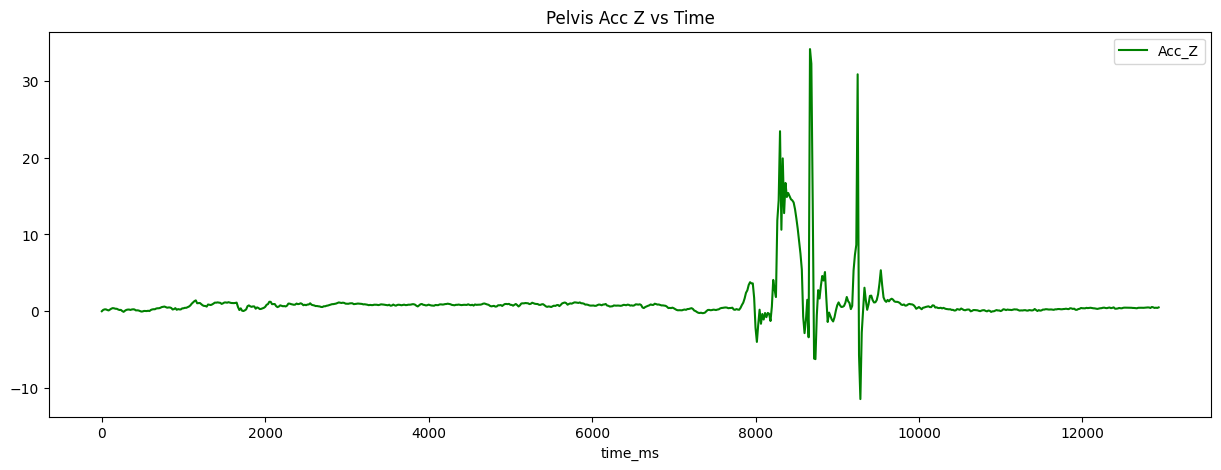

In [11]:
# visualize the data and find the connection between the accelerometer  and times 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')